Input shape: [18]


/home/bs00815/Desktop/probability_statistics_and_machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-01 18:17:12.033094: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Minimum Validation Loss: 0.2023


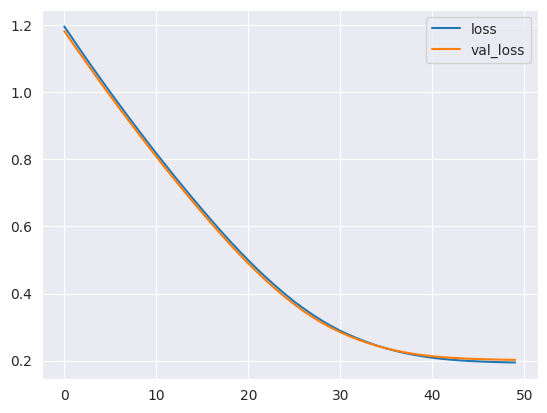

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('./data/spotify.csv')
spotify.head()

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X.track_artist

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We will do a `grouped` split to keep all of an artist's songs in one
# Split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.8):
    split = GroupShuffleSplit(n_splits=10, test_size=train_size)
    train, test = next(split.split(X, y, group))
    return X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]


X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[-1]]
print(f"Input shape: {input_shape}")

model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.1984


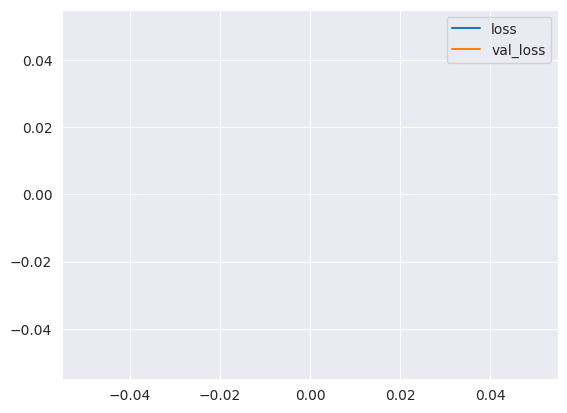

In [12]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Epoch 1/50


/home/bs00815/Desktop/probability_statistics_and_machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2612 - val_loss: 0.2353
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2102 - val_loss: 0.2158
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1994 - val_loss: 0.2089
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1920 - val_loss: 0.2066
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1872 - val_loss: 0.2058
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1835 - val_loss: 0.2054
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1818 - val_loss: 0.2052
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1785 - val_loss: 0.2050
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1769 - val_loss: 0.2044
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1757 - val_loss: 0.2045
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1735 - val_loss: 0.2044
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1728 - val_loss: 0.2040

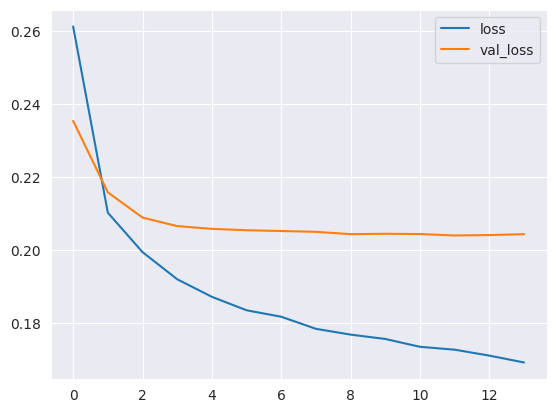

In [13]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

/home/bs00815/Desktop/probability_statistics_and_machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


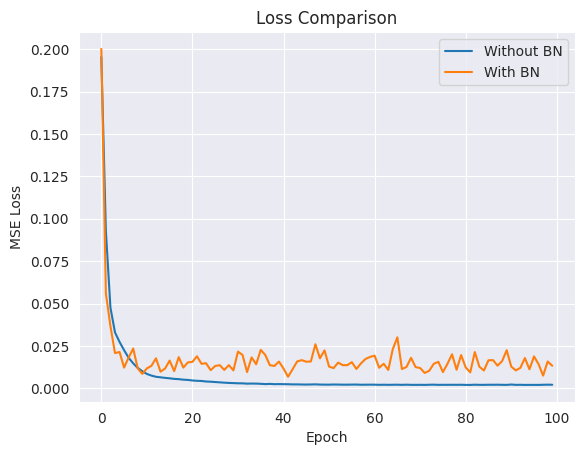

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# সিম্পল ডেটা তৈরি (X থেকে y প্রেডিকশন)
X = np.linspace(-1, 1, 200)
y = X ** 2 + np.random.normal(0, 0.05, X.shape)

# reshape করে মডেল ইনপুট এর মত বানাই
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# মডেল ব্যাচ নরমালাইজেশন ছাড়া
model_without_bn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# মডেল ব্যাচ নরমালাইজেশন সহ
model_with_bn = keras.Sequential([
    layers.Dense(64, input_shape=(1,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1)
])

# দুই মডেলের কম্পাইল
model_without_bn.compile(optimizer='adam', loss='mse')
model_with_bn.compile(optimizer='adam', loss='mse')

# দুই মডেল ট্রেইন
history_without_bn = model_without_bn.fit(X, y, epochs=100, verbose=0)
history_with_bn = model_with_bn.fit(X, y, epochs=100, verbose=0)

# লস কম্পেয়ার
plt.plot(history_without_bn.history['loss'], label='Without BN')
plt.plot(history_with_bn.history['loss'], label='With BN')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()
